# Exploratory Data Analysis on Windows Store Data
Personal task of the Data Analysis module in Data Science course in Purwadhika. In this task, dataset from Kaggle will be explored to solve an existing problem based on the dataset that we choose. After that, recommendation for solving the problem will be given.

Dataset: https://www.kaggle.com/vishnuvarthanrao/windows-store

There will be several steps that we will do:
1. Read Data & Check Data
2. Define Goals
3. Data/DataFrame Cleaning
4. Explore the Data
5. Conclusion & Answer Goal
6. Recommendation

So without further ado, let's get started!

## Import Libraries

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import dateparser
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Read Data & Check Data

In [2]:
df = pd.read_csv('msft.csv')
df

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00


### 1.1 Check detail data

In [3]:
data_detail = []

for i in df.columns:
    data_detail.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data_detail, columns=[
    'Data Features(Col)',
    'Data Types',
    'Null Total',
    'Null Percentage %',
    'Number of Uniqueness',
    'Unique Sample'
])

,Data Features(Col),Data Types,Null Total,Null Percentage %,Number of Uniqueness,Unique Sample
0,Name,object,1,0.02,5317,"[Hot Pics HD, EarthLive]"
1,Rating,float64,1,0.02,9,"[4.0, 3.5]"
2,No of people Rated,int64,0,0.00,899,"[362, 533]"
3,Category,object,1,0.02,13,"[Government and Politics, Multimedia Design]"
4,Date,object,1,0.02,2124,"[01-12-2017, 10-12-2019]"
5,Price,object,1,0.02,44,"[₹ 139.00, ₹ 699.00]"


In [4]:
df.describe()

,Rating,No of people Rated
count,5321.000000,5322.000000
mean,3.792708,551.873168
std,0.991681,259.820088
min,1.000000,100.000000
25%,3.500000,327.000000
50%,4.000000,548.000000
75%,4.500000,779.000000
max,5.000000,1000.000000


### 1.2 Check is there any potential duplicate in primary key columns or the uniqueness

In [5]:
df[df.duplicated(['Name'], keep=False)]

,Name,Rating,No of people Rated,Category,Date,Price
1321,Multilingual Translator,2.0,691,Developer Tools,30-04-2020,Free
2241,http://microsoft.com,3.5,498,Government and Politics,08-02-2019,Free
2450,http://microsoft.com,3.0,886,Health and Fitness,08-02-2019,Free
3105,http://microsoft.com,2.5,414,Kids and Family,12-02-2019,Free
4707,Newspapers,3.5,702,News and Weather,26-10-2012,Free
4712,Newspapers,4.5,904,News and Weather,07-11-2012,Free
5291,Multilingual Translator,2.0,990,Developer Tools,30-04-2020,₹ 219.00


we see that there are applications with the same name, but even though the names are same but the release date of the applications is different, there are also those whose names are same but the type of application is different between free and paid. So we can conclude that similar name is not necessary to solve because they are different.

#### *Exploration Result*
So we've import all libraries and the dataset.
The dataset itself is about all applications in Windows Store platform. 
From the dataset, we see that there are 6 columns consist of:
- Name: Name of the app
- Rating: Rating for the app
- No of People Rated : Number of people who rated the app
- Category : Category of the app
- Date : Date when it is posted
- Price : Price of the app

And then, we see the result of detail inspection of dataframe
- All the columns/features name still in Title style, perhaps we'll change it to python style
- There's only 0.02% of null percentage, we might drop that null data later
- Name column is the only column that can be our primary key, so after we checked its uniqueness, it turned out that there were duplicates when viewed from the name, but overall it was a different application
- Date column datatypes still object, we'll change it later and extract it into piece (day, month, year)
- Price writing format is still in non-standard form. We will change it to the standard form and convert it into usd/rupiah
- We need to add a column that descripting the rating
- We need to add a column that identify binarily the price

## 2. Define Goals

From the previous exploration on Read&Check data, we can set the goals for the company:
1. Spell out meaningful insights from our exploration
2. find out if the rating has an effect on the app's price.
3. find out if an app that has a good rating should make a paid version or is there a paid version already?

## 3. Data/DataFrame Cleaning

### 3.1 Rename columns

In [6]:
df.columns

Index(['Name', 'Rating', 'No of people Rated', 'Category', 'Date', 'Price'], dtype='object')

In [7]:
df.rename(index=str, columns={
    'Name': 'name',
    'Rating': 'rating',
    'No of people Rated': 'num_rated',
    'Category': 'category',
    'Date': 'date',
    'Price': 'price'
}, inplace=True)

df.columns

Index(['name', 'rating', 'num_rated', 'category', 'date', 'price'], dtype='object')

### 3.2 Checking null

In [8]:
df[df['name'].isnull()]

,name,rating,num_rated,category,date,price
5321,NaN,NaN,948,NaN,NaN,NaN


Okay as we can see, there's a row data who only has num_rated and the others is null, so we will remove it anyway

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

name         0
rating       0
num_rated    0
category     0
date         0
price        0
dtype: int64

### 3.3 Rating Column


In [10]:
df.rating.unique()

array([3.5, 3. , 2. , 4.5, 4. , 1. , 2.5, 5. , 1.5])

So unique values from rating columns are:
1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0
We can classify them into 3 categories:
1. 4-5 is Good
2. 2.5 - 3.5 is Average
3. 1-2 is Poor

so we made a column consist of description of its rating:

In [11]:
df['rating_name'] = df['rating'].apply(lambda x: 'Good' if x >= 4 else ('Average' if x >= 2.5 and x <= 3.5  else 'Poor'))
# lambda x : x*2 if x < 10 else (x*3 if x < 20 else x)
df

,name,rating,num_rated,category,date,price,rating_name
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free,Average
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free,Average
2,BookViewer,3.5,593,Books,29-02-2016,Free,Average
3,Brick Instructions,3.5,684,Books,30-01-2018,Free,Average
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free,Poor
...,...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,08-08-2019,₹ 54.50,Average
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00,Poor
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00,Average
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00,Good


### 3.4 Date Column

- First thing first, we need to change the data type of our date column into datetime with format D-M-Y.
- After that, we extract the date as needed (e.g. day, week, day of week, year)

In [12]:
df['date'] = pd.to_datetime(df.date, format='%d-%m-%Y')
df

,name,rating,num_rated,category,date,price,rating_name
0,Dynamic Reader,3.5,268,Books,2014-01-07,Free,Average
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-01-08,Free,Average
2,BookViewer,3.5,593,Books,2016-02-29,Free,Average
3,Brick Instructions,3.5,684,Books,2018-01-30,Free,Average
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,Free,Poor
...,...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,2019-08-08,₹ 54.50,Average
5317,JS King,1.0,720,Developer Tools,2018-07-19,₹ 269.00,Poor
5318,MQTTSniffer,2.5,500,Developer Tools,2017-04-10,₹ 64.00,Average
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,2019-11-18,₹ 269.00,Good


#### Extracting date

In [13]:
date_dt = df['date'].dt
df['day'] = date_dt.dayofweek
df['date_day'] = date_dt.day
df['month'] = date_dt.month
df['month_name'] = date_dt.month_name()
df['year_month'] = date_dt.to_period('M')
df['year'] = date_dt.year

In [14]:
df

,name,rating,num_rated,category,date,price,rating_name,day,date_day,month,month_name,year_month,year
0,Dynamic Reader,3.5,268,Books,2014-01-07,Free,Average,1,7,1,January,2014-01,2014
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-01-08,Free,Average,2,8,1,January,2014-01,2014
2,BookViewer,3.5,593,Books,2016-02-29,Free,Average,0,29,2,February,2016-02,2016
3,Brick Instructions,3.5,684,Books,2018-01-30,Free,Average,1,30,1,January,2018-01,2018
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,Free,Poor,1,30,1,January,2018-01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,2019-08-08,₹ 54.50,Average,3,8,8,August,2019-08,2019
5317,JS King,1.0,720,Developer Tools,2018-07-19,₹ 269.00,Poor,3,19,7,July,2018-07,2018
5318,MQTTSniffer,2.5,500,Developer Tools,2017-04-10,₹ 64.00,Average,0,10,4,April,2017-04,2017
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,2019-11-18,₹ 269.00,Good,0,18,11,November,2019-11,2019


### 3.5 Price column

- Man, we gotta remove the '₹' because we're not in India.
- And convert all the values to USD by multiplying by 0.014, bcs 1 rupe in India is segelas susu

In [15]:
df['price'] = df['price'].replace('Free', '₹ 0')
df['price'] = df['price'].apply(lambda x: str(x).replace('₹', ''))
df['price'] = df['price'].str.replace(',', '').astype('float64')
df['price'] = df['price'] * 0.014
df['price'].unique()

array([ 0.    ,  2.016 ,  0.756 ,  1.386 ,  3.066 ,  3.766 ,  1.876 ,
        2.296 ,  1.526 , 22.736 , 15.386 , 18.886 ,  0.826 ,  2.156 ,
        1.666 ,  1.316 ,  0.966 ,  1.946 ,  2.646 ,  7.686 ,  1.106 ,
       36.386 ,  4.186 ,  8.036 ,  4.6116, 21.3052,  4.536 , 11.536 ,
       76.286 ,  1.253 ,  1.596 ,  2.716 ,  4.466 ,  8.736 , 30.086 ,
       16.086 ,  6.076 ,  3.906 ,  2.926 ,  9.786 , 26.586 ,  6.846 ,
        0.763 ,  0.896 ])

### 3.6 Categorizing Price Column

To make it easier for you later, add a new column called 'is_free' to identify wether the app is free or not

In [16]:
df['is_free'] = df['price'].apply(lambda x: 1 if x == 0.000 else 0)
df

,name,rating,num_rated,category,date,price,rating_name,day,date_day,month,month_name,year_month,year,is_free
0,Dynamic Reader,3.5,268,Books,2014-01-07,0.000,Average,1,7,1,January,2014-01,2014,1
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-01-08,0.000,Average,2,8,1,January,2014-01,2014,1
2,BookViewer,3.5,593,Books,2016-02-29,0.000,Average,0,29,2,February,2016-02,2016,1
3,Brick Instructions,3.5,684,Books,2018-01-30,0.000,Average,1,30,1,January,2018-01,2018,1
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,0.000,Poor,1,30,1,January,2018-01,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,2019-08-08,0.763,Average,3,8,8,August,2019-08,2019,0
5317,JS King,1.0,720,Developer Tools,2018-07-19,3.766,Poor,3,19,7,July,2018-07,2018,0
5318,MQTTSniffer,2.5,500,Developer Tools,2017-04-10,0.896,Average,0,10,4,April,2017-04,2017,0
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,2019-11-18,3.766,Good,0,18,11,November,2019-11,2019,0


### 3.7 Category column

In [17]:
df.category.unique()

array(['Books', 'Business', 'Developer Tools', 'Social',
       'Food and Dining', 'Government and Politics', 'Health and Fitness',
       'Kids and Family', 'Lifestyle', 'Multimedia Design', 'Music',
       'Navigation and Maps', 'News and Weather'], dtype=object)

nothing looks so suspicious, we move.

#### *Data Cleaning Result*
Okay we've come this far but we haven't see the finish line. We've prepared our dataframe from the main df but the columns are not ordered yet; so after this, we order the column based on my preferency ehehehe and then we move into Exploration step!

In [18]:
df.columns

Index(['name', 'rating', 'num_rated', 'category', 'date', 'price',
       'rating_name', 'day', 'date_day', 'month', 'month_name', 'year_month',
       'year', 'is_free'],
      dtype='object')

In [19]:
column_names = ['name', 'category', 'price', 'is_free', 'rating', 'rating_name', 'num_rated', 'date', 
                'day', 'date_day', 'month', 'month_name', 'year_month','year']

df = df.reindex(columns=column_names)
df

,name,category,price,is_free,rating,rating_name,num_rated,date,day,date_day,month,month_name,year_month,year
0,Dynamic Reader,Books,0.000,1,3.5,Average,268,2014-01-07,1,7,1,January,2014-01,2014
1,"Chemistry, Organic Chemistry and Biochemistry-...",Books,0.000,1,3.0,Average,627,2014-01-08,2,8,1,January,2014-01,2014
2,BookViewer,Books,0.000,1,3.5,Average,593,2016-02-29,0,29,2,February,2016-02,2016
3,Brick Instructions,Books,0.000,1,3.5,Average,684,2018-01-30,1,30,1,January,2018-01,2018
4,Introduction to Python Programming by GoLearni...,Books,0.000,1,2.0,Poor,634,2018-01-30,1,30,1,January,2018-01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,Get Color,Developer Tools,0.763,0,3.0,Average,785,2019-08-08,3,8,8,August,2019-08,2019
5317,JS King,Developer Tools,3.766,0,1.0,Poor,720,2018-07-19,3,19,7,July,2018-07,2018
5318,MQTTSniffer,Developer Tools,0.896,0,2.5,Average,500,2017-04-10,0,10,4,April,2017-04,2017
5319,"Dev Utils - JSON, CSV and XML",Developer Tools,3.766,0,4.0,Good,862,2019-11-18,0,18,11,November,2019-11,2019


## 4. Explore the Data

So we've come to the core step of this task. Exploring the data. What will we explore? Well, I guess there are several simple-basic insight that we have to get from the exploration, such as:
- Check what category are the most
- Comparison of paid and unpaid apps
- Distribution of Rating
- Explore rating by category, num_rated, and date
- etc

Just do it first and we'll see what come next.

### 4.1 Explore Category

#### Number of categories from the Apps

In [20]:
df.groupby('category')['name'].count().reset_index(name='category_count').sort_values('category_count', ascending=False)

,category,category_count
9,Music,753
0,Books,707
1,Business,679
5,Health and Fitness,527
2,Developer Tools,500
7,Lifestyle,492
11,News and Weather,483
6,Kids and Family,345
12,Social,328
3,Food and Dining,166


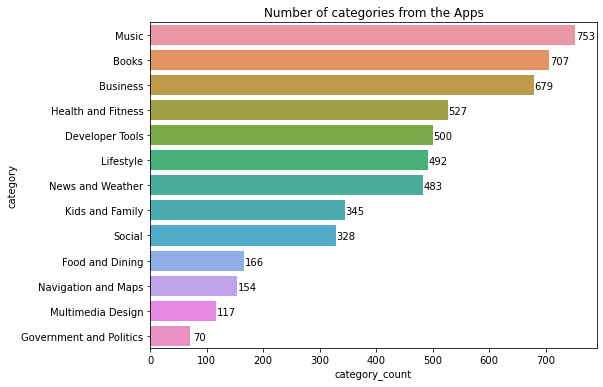

In [21]:
count_category = df.groupby('category')['name'].count().reset_index(name='category_count').sort_values('category_count', ascending=False)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='category_count', y='category', data=count_category)
for p in graph.patches:
    width = p.get_width()
    plt.text(18+p.get_width(), p.get_y()+ 0.55*p.get_height(),'{:1.0f}'.format(width), ha='center', va='center')
    
# plt.xticks(rotation=90)
plt.title('Number of categories from the Apps')
plt.show()

#### Top 3 and Bottom 3 Number of Apps

In [22]:
count_category.head(3)

,category,category_count
9,Music,753
0,Books,707
1,Business,679


In [23]:
count_category.tail(3)

,category,category_count
10,Navigation and Maps,154
8,Multimedia Design,117
4,Government and Politics,70


#### Number of Apps release based on each month

In [24]:
pd.crosstab(index=df['category'], columns=df['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
category,,,,,,,,,,,,
Books,99,59,75,43,63,50,60,41,41,51,72,53
Business,62,68,49,44,90,64,47,44,55,66,51,39
Developer Tools,49,36,53,31,42,38,36,49,44,49,38,35
Food and Dining,11,17,20,9,9,16,14,9,12,8,21,20
Government and Politics,8,8,3,2,11,2,9,2,5,14,1,5
Health and Fitness,66,47,38,52,37,40,33,63,33,41,42,35
Kids and Family,32,51,33,23,15,18,43,30,30,35,16,19
Lifestyle,47,49,68,34,38,41,37,29,28,44,39,38
Multimedia Design,15,6,16,9,11,7,13,6,7,12,10,5


#### checking trend of most donwload apps category

In [25]:
# df[df['category'] == 'Music'].pivot_tabel(index='year', values='name', aggfunc='count')
music_growth = pd.pivot_table(data=df[df['category'] == 'Music'], index='year', values='name', aggfunc='count').reset_index()
music_growth.rename(columns={'name':'music_count'}, inplace=True)

book_growth = pd.pivot_table(data=df[df['category'] == 'Books'], index='year', values='name', aggfunc='count').reset_index()
book_growth.rename(columns={'name':'book_count'}, inplace=True)

business_growth = pd.pivot_table(data=df[df['category'] == 'Business'], index='year', values='name', aggfunc='count').reset_index()
business_growth.rename(columns={'name':'business_count'}, inplace=True)

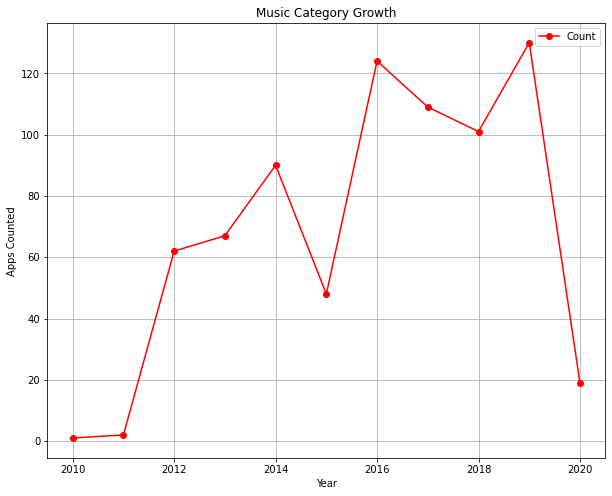

In [26]:
plt.figure(figsize=(10,8))
plt.plot(music_growth['year'],music_growth['music_count'], 'ro-')
plt.title("Music Category Growth")
plt.xlabel("Year")
plt.ylabel("Apps Counted")
plt.grid(True)
plt.legend(["Count"], loc=0)
plt.show()

In [27]:
music_growth

,year,music_count
0,2010,1
1,2011,2
2,2012,62
3,2013,67
4,2014,90
5,2015,48
6,2016,124
7,2017,109
8,2018,101
9,2019,130


In [28]:
df_cat_nsum = df.groupby('category')['num_rated'].sum().reset_index(name='sum').sort_values('sum')
df_cat_nsum

,category,sum
4,Government and Politics,38379
8,Multimedia Design,69678
10,Navigation and Maps,84859
3,Food and Dining,91448
12,Social,188652
6,Kids and Family,190832
11,News and Weather,265386
2,Developer Tools,272678
7,Lifestyle,273025
5,Health and Fitness,294333


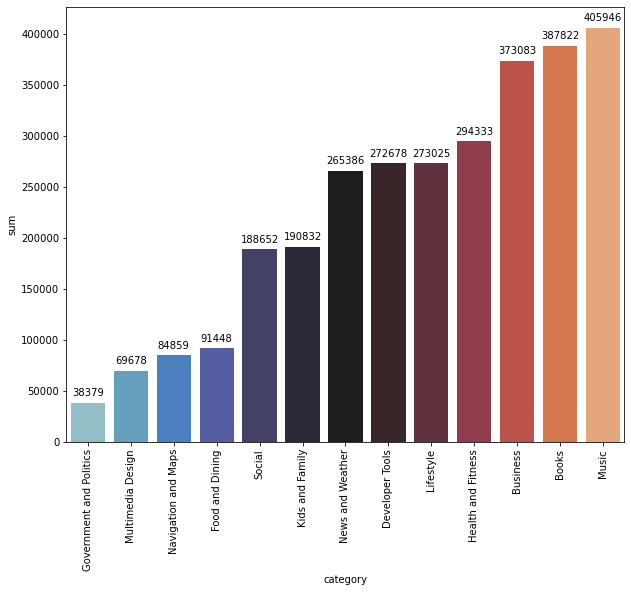

In [29]:
plt.figure(figsize=(10,8))
graph = sns.barplot(x='category', y='sum', data=df_cat_nsum, palette='icefire')
# for index, row in df_cat_nsum.iterrows():
#     graph.text(row.name, row.sum + 0.1, row.sum,color='black')
    
for i in graph.patches:
    graph.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()), 
                   ha='center', va='center', xytext=(0,10), textcoords = 'offset points')
    
# for p in g.patches:
#   g.annotate(int(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), 
#              ha='center', va='center', xytext=(0,10), textcoords = 'offset points')

    
plt.xticks(rotation=90)
plt.show()



#### *Explore Category Result*
1. Music, Book, Business becomes the category that most donwloaded and most rated from 2010-2020
2. While Navigation, Multimedia Design, Government&Politics becomes bottom 3

Okay now let's see the comparison between free Apps and Paid Apps

### 4.2 Comparison of paid and unpaid apps

In [30]:
df.head()

,name,category,price,is_free,rating,rating_name,num_rated,date,day,date_day,month,month_name,year_month,year
0,Dynamic Reader,Books,0.0,1,3.5,Average,268,2014-01-07,1,7,1,January,2014-01,2014
1,"Chemistry, Organic Chemistry and Biochemistry-...",Books,0.0,1,3.0,Average,627,2014-01-08,2,8,1,January,2014-01,2014
2,BookViewer,Books,0.0,1,3.5,Average,593,2016-02-29,0,29,2,February,2016-02,2016
3,Brick Instructions,Books,0.0,1,3.5,Average,684,2018-01-30,1,30,1,January,2018-01,2018
4,Introduction to Python Programming by GoLearni...,Books,0.0,1,2.0,Poor,634,2018-01-30,1,30,1,January,2018-01,2018


In [31]:
df_free = df[df['is_free'] == 1]
df_paid = df[df['is_free'] == 0]

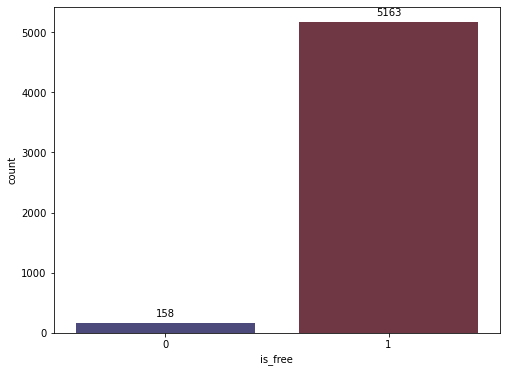

In [32]:
plt.figure(figsize=(8,6))
df_cat_nsum = df.groupby('is_free')['name'].count().reset_index(name='count')
graph = sns.barplot(x='is_free', y='count', data=df_cat_nsum, palette='icefire')
    
for i in graph.patches:
    graph.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()), 
                   ha='center', va='center', xytext=(0,10), textcoords = 'offset points')

    
# plt.xticks(rotation=90)
plt.show()

Okay the comparison between number of paid apps with free apps is too far. There only 158 apps with paid apps categorize, while for Free Apps there are 5163 apps.

In [33]:
pd.crosstab(index=df['is_free'], columns=df['category'])

category,Books,Business,Developer Tools,Food and Dining,Government and Politics,Health and Fitness,Kids and Family,Lifestyle,Multimedia Design,Music,Navigation and Maps,News and Weather,Social
is_free,,,,,,,,,,,,,
0,56,52,50,0,0,0,0,0,0,0,0,0,0
1,651,627,450,166,70,527,345,492,117,753,154,483,328


In tabular view, we can see that paid apps are only in Books, Business and Developer Tools categories.

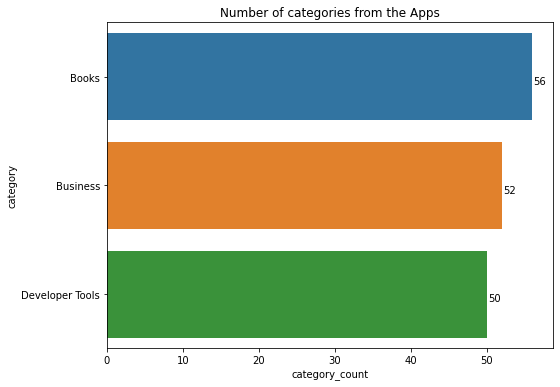

In [34]:
count_category_paid = df_paid.groupby('category')['name'].count().reset_index(name='category_count').sort_values('category_count', ascending=False)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='category_count', y='category', data=count_category_paid)
for p in graph.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+ 0.55*p.get_height(),'{:1.0f}'.format(width), ha='center', va='center')
    
# plt.xticks(rotation=90)
plt.title('Number of categories from the Apps')
plt.show()

From the barplot result above, we can see that Books and Business categories are in the top 3 of donwloaded and rated apps, also they have paid apps too. while Developer Tools is in middle class of downloaded and rated apps.

Okay now let's see how many peoples gave a rate to those paid apps

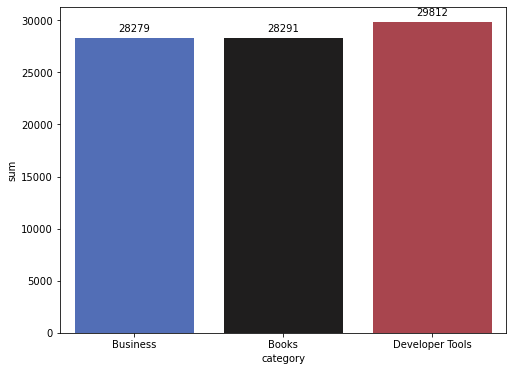

In [39]:
plt.figure(figsize=(8,6))
df_paid_nsum = df_paid.groupby('category')['num_rated'].sum().reset_index(name='sum').sort_values('sum')
graph = sns.barplot(x='category', y='sum', data=df_paid_nsum, palette='icefire')
    
for i in graph.patches:
    graph.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()), 
                   ha='center', va='center', xytext=(0,10), textcoords = 'offset points')
    
plt.show()

Developer Tools become the most rated apps in Paid Apps category.
Now let's see how is rating on paid apps. 

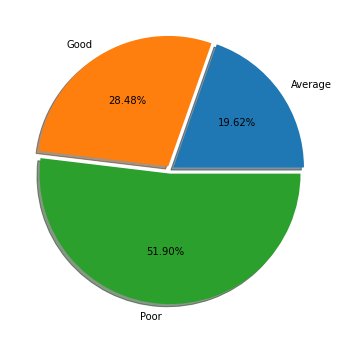

In [53]:
rating_paid = df_paid.groupby('rating_name')['name'].count().reset_index(name='count')
plt.figure(figsize=(10,6))
plt.pie(rating_paid['count'], labels=['Average', 'Good', 'Poor'],
        shadow=True, 
        autopct = '%1.2f%%',
        explode = (0.03, 0.03, 0.03)
       )
plt.show()

There still so many peoples rated a paid apps as Poor or between 1 - 2 score for rating. Let's what category is it.

In [57]:
pd.crosstab(index=df_paid['rating_name'], columns=df_paid['category'], margins=True)

category,Books,Business,Developer Tools,All
rating_name,,,,
Average,9,4,18,31
Good,20,4,21,45
Poor,27,44,11,82
All,56,52,50,158


From the result above we can see that 44 apps on Business apps that have rating as a Poor, it is the highest among the other apps.

Okay now let's see the growth of release paid apps through the year

In [66]:
year_paid = df_paid.groupby('year')['name'].count().reset_index(name='count')
year_paid

,year,count
0,2011,1
1,2012,1
2,2013,6
3,2014,9
4,2015,9
5,2016,10
6,2017,12
7,2018,16
8,2019,26
9,2020,68


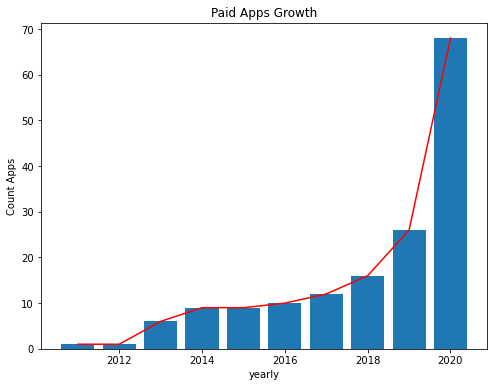

In [65]:
plt.figure(figsize=(8,6))
plt.plot(year_paid['year'], year_paid['count'], color='r')
plt.bar(year_paid['year'], year_paid['count'])
plt.title('Paid Apps Growth')
plt.xlabel('yearly')
plt.ylabel('Count Apps')
plt.show()

the growth in the number of applications continues to increase each year even though the number is very small when compared to Free Apps

### 4.3 Distribution of Rating

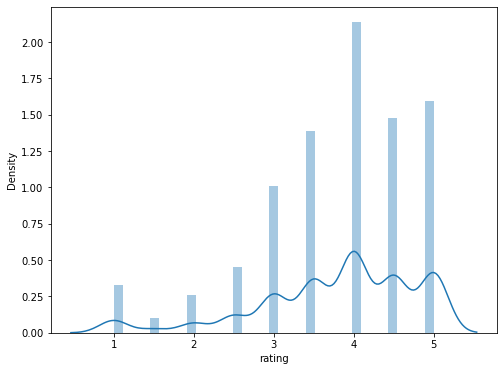

In [67]:
plt.figure(figsize=(8,6))
sns.distplot(df["rating"], kde=True)
plt.show()

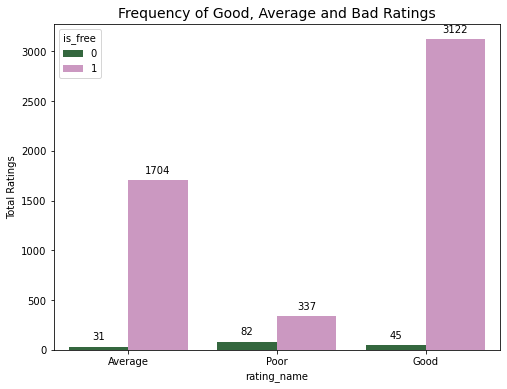

In [69]:
plt.figure(figsize=(8,6))
g = sns.countplot(df['rating_name'], hue=df['is_free'], palette="cubehelix")
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0,10), textcoords = 'offset points')
g.set_ylabel('Total Ratings')
g.set_title('Frequency of Good, Average and Bad Ratings', fontsize=14)
plt.show()

## 5. Conclusion

#### okay now let's go back again to see our goals:

**Can this free application can be a paid application?**

- Dari hasil inspeksi data yang kita lakukan pada data aplikasi yang ada di Windows Store, ada perbandingan jauh antara jumlah aplikasi yang berbayar dan gratis. Tentu masih jauh lebih banyak aplikasi yang gratis.

- Aplikasi dengan kategori Music, Business, Books menjadi 3 aplikasi yang paling sering didownload dan memiliki jumlah user yang memberi rating tertinggi.

- Untuk jenis aplikasi yang berbayar hanya ada 3 kategori yaitu Books, Business dan Developer Tools.

- Untuk jenis aplikasi yang berbayar masih 51% para pengguna belum puas hingga memberi rating antar 1-2, sisanya sudah memberi rating di atas 2.

- Sedangkan secara keseluruan antar aplikasi berbayar dan tidak, banyak aplikasi didominasi dengan nilai rating antar score 4-5 atau berating bagus.

- Maka dari sini kita bisa menarik kesimpulan, suatu aplikasi bisa dan harus dibuat versi berbayarnya jika sudah memberikan layanan atau konten yang bagus, sehingga para pengguna juga bersedia mengeluarkan biaya untuk mengunduh aplikasi tersebut.

- Sudah jelas lebih menguntungkan bagi Windows dan pengembang aplikasi jika aplikasinya diunduh dengan syarat ada harga yang harus dibayar, namun jika track record dari aplikasi yang berbayar masih belum bagus berarti ada permasalahan yang lebih harus diselesaikan dahulu agar feedback dari pengguna bisa maksimal.

## 6. Recommendation

Tidak perlu langsung menjadikan suatu aplikasi dengan kategori tertentu yang awalnya Free menjadi berbayar. Ada beberapa hal yang bisa dilakukan:
1. Untuk kategori Musik yang mana menjadi top Apps dengan jumlah diberikan rating terbanyak, bisa dibuat konten yang lebih exclusive atau dibuat masa penggunaan terbatas, sehingga jika ingin melanjutkan pengunaan bisa melakukan subscribe paket premium tersebut. Jika tidak membeli paket premium tersebut, aplikasi musik tersebut membatasi penggunaan fitur di dalamnya seperti tidak bisa mengulangi lagu atau tidak bisa mendengarkan beberapa episode podcast.
---------------------------------------------------------------------------------------------------------------------------
2. Aplikasi dengan kategori Developer Tools juga salah satu yang bisa diangkat dengan pemberian eksklusifitasan fitur, karena berdasarkan insight yang didapat kategori ini merupakan salah satu kategori yang ada applikasina yang berbayar dan yang paling banyak diberi rating Good dari pada Average dan Poor. Sehingga aplikasi lain mungkin bisa mengikuti jejak aplikasi2 Developer Tools lain yang sudah berbayar dan jelas akan jadi lebih menguntungkan dari segi pemasukan namun disertai fitur yang bagus juga.
----------------------------------------------------------------------------------------------------------------------------
